#### Author: Ahmad Sikder  
##### Student ID:44229828

# Assignment 1

The car's market price data set consists of three types of entities: 
* the specification of an auto in terms of various characteristics;
* its assigned insurance risk rating;
* its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

### Attribute Information

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 to 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

### Relevant Papers

Kibler, D., Aha, D.W., & Albert,M. (1989). Instance-based prediction of real-valued attributes. Computational Intelligence, Vol 5, 51--57. 

## Task 1 - Data Exploration [10 Marks]

###  1.1 Import Data

**Q [1 Mark]:** Upload the dataset of `Cars.data`. Import the dataset into a data frame named **cars**. Please also name each attribute (see *Attribute Information* section above).

In [1]:
import csv
import pandas as pd 
import os 
from sklearn.impute import SimpleImputer
import numpy as np
import scipy 
from scipy.stats import spearmanr

In [2]:
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
cars = pd.read_csv("cars.data.csv", names = columns, na_values=["?"])
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


###  1.2 Data Cleaning

**Q [1 Mark]:** Look at columns `symboling` and `normalized-losses`, code to report whether we have missing value(s) for each of these two columns. If any, report the number of missing values.

Note: Here missing values only refer to the "?".

In [3]:
def countMissingVal(row):
    count = 0
    for i in row: 
        if pd.isna(i):
            count+=1
    return count
symbolingCol = cars['symboling'].tolist()
normalizedLossesCol = cars['normalized-losses'].tolist()
countMissingVal(symbolingCol) + countMissingVal(normalizedLossesCol) 

41

**Q [1 Mark]:** Report the number of columns which have missing values in the **cars** data.

In [4]:
def containsMissingVal(col):
    column = cars[col].tolist()
    for i in column: 
        if pd.isna(i):
            return True
    return False

countCols = 0
columns = list(cars)

for col in columns:
    if(containsMissingVal(col)):
        countCols+=1

countCols

7

**Q [1 Mark]:** Report the total number of missing values in the **cars** data.

In [5]:
countTotalMissingVals = 0
for col in columns:
    if(containsMissingVal(col)):
        countTotalMissingVals += countMissingVal(cars[col].tolist())
countTotalMissingVals

59

**Q [2 Marks]:** If you do find that this data has missing values, replace the missing values using the following strategy:

- For numerical column, replace the missing values with the mean value of that column.
- For categorical column, replace the missing values with the most frequent value of that column.

Hint: Refer to [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [6]:
#The function is_number(s) code was taken from https://www.pythoncentral.io/how-to-check-if-a-string-is-a-number-in-python-including-unicode/
def is_number(s):
    if(pd.isna(s)):
        return False
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

def isNumericalCol(col):
    column = cars[col].tolist()
    for i in column: 
        if is_number(i):
            return True
    return False


#impute numerical columns
for col in columns:
    if(isNumericalCol(col)):
        cars[col]=pd.to_numeric(cars[col], errors='coerce')
        cars[col].fillna(cars[col].mean(), inplace=True)

#impute non-numerical columns
for col in columns:
    if(containsMissingVal(col)):
        cars[col].fillna(cars[col].mode()[0], inplace=True)
        



###  1.3 Data Exploration

**Q [1 Mark]:** Draw a histogram on `Price` and discuss your findings.

In [7]:
Price_Histogram = cars.hist(column="price",bins=8)

#Name axes in the histogram 
for ax in Price_Histogram.flatten():
    ax.set_xlabel("Price")
    ax.set_ylabel("Number of cars")
Price_Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EADF2F30F0>]],
      dtype=object)

In the histogram of price above, the dataset has been devided into eight groups. Those groups are 5000-10000, 10000-15000, 15000-20000, 20000-25000, 25000-30000, 30000-35000,35000-40000,40000-45000 etc. Once the groups have been chosen, the frequency of each group is determined. The frequency is simply the number of cars of the price values that are in each group. The group 50000 - 10000 has the highest number of cars and the group 25000-30000. As the price increases the number of cars decreases. This means there is a negative linear relationship between price and the number of cars. 

**Q [1 Mark]:** Choose a suitable method and report the relationship (e.g., linear) between `price` and `horsepower`.

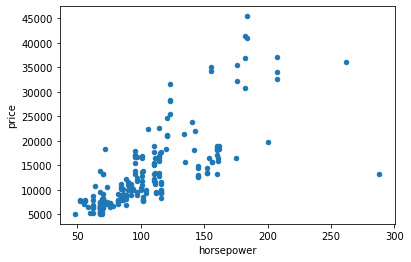

In [8]:
price_horsePower = cars.plot.scatter(x='horsepower', y='price')

The scatter plot above shows the relationship between horsepower and price of a car. The horspower has been chosen as the predictor variable and the price was the response variable.
The diagram shows a positive linear pattern as the horsepower of a car increases the price of a car increases. However, some of the points are further apart from each other, hence the coleration is a weak positive linear coleration.
The most expensive cars are cars with 180 horsepower.

**Q [1 Mark]:** Choose a suitable method and report the relationship between `price` and `make`.

In [9]:
bins_Values = [10000, 15000,20000, 25000, 30000, 35000,40000,45000]
priceGroups = ['5000 - 10000','10000 - 15000', '15000 - 20000', '20000 - 25000', '25000 - 30000', '30000 - 35000','35000 - 40000','40000 - 45000']
cars['prices_Grouped'] = pd.cut(cars['price'], 8,labels=priceGroups)
price_makeRelationship = pd.crosstab(cars.prices_Grouped,cars.make)
price_makeRelationship

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
prices_Grouped,,,,,,,,,,,,,,,,,,,,,
5000 - 10000,0,0,0,3,8,10,1,0,7,0,...,12,0,6,0,2,0,9,22,8,0
10000 - 15000,1,2,0,0,1,3,3,0,7,0,...,3,4,1,1,0,3,3,5,4,2
15000 - 20000,2,4,2,0,0,0,0,0,3,0,...,3,7,0,0,0,3,0,5,0,6
20000 - 25000,0,1,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
25000 - 30000,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
30000 - 35000,0,0,1,0,0,0,0,1,0,3,...,0,0,0,2,0,0,0,0,0,0
35000 - 40000,0,0,1,0,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
40000 - 45000,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


The table above shows the visual representation of the relationship of the price groups and its makes. A Chi Square test was performed on the table to find the statistical significance and the independence of the values.

In [10]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(price_makeRelationship.values)
print("Chi-Square statistics " + str( chi2) + " p_value " + str(p))

Chi-Square statistics 433.312475000331 p_value 5.109110307631662e-30


The Chi-square statisticsis 433.3 and Pvalue is close to 0. A value will be chosen to represent the significance level to test against the Pvalue against the significant level. If the pval is less then the significant level then null hypothesis will be rejected and the value will be declared dependent. Else, the null hypothesis wont be rejected and the values will be independent.

In [11]:
probability = 0.95 #assumed probability
alpha = 1-probability #chosen significant level
if p <= alpha:
    print('Dependent values, null hypothesis rejected')
else:
    print('Independent values, null hypothesis not rejected')


Dependent values, null hypothesis rejected


Since P value was less than the chosen signifcant level the values are dependant 

**Q [1 Mark]:** Choose a suitable method and report the relationship between `price` and `make`. Note: here suppose you are only interested in these makes `honda`, `audi`, `mazda`, `bmw`, `audi`, `toyota`, your X-axis thus only includes these makes.

In [12]:
some_values = ['honda', 'audi', 'mazda', 'bmw', 'audi', 'toyota']
specialMakes = cars.loc[cars['make'].isin(some_values)]
specialPrice_MakeRelationship = pd.crosstab(specialMakes.prices_Grouped,specialMakes.make)
specialPrice_MakeRelationship

make,audi,bmw,honda,mazda,toyota
prices_Grouped,,,,,
5000 - 10000,0,0,10,7,22
10000 - 15000,2,0,3,7,5
15000 - 20000,4,2,0,3,5
20000 - 25000,1,3,0,0,0
30000 - 35000,0,1,0,0,0
35000 - 40000,0,1,0,0,0
40000 - 45000,0,1,0,0,0


Visual representation is shown above

In [13]:
chi2, p, dof, expected = chi2_contingency(specialPrice_MakeRelationship.values)
print("Chi-Square statistics " + str( chi2) + " p_value " + str(p))

Chi-Square statistics 71.8696220504387 p_value 1.1351343850092232e-06


In [14]:
probability = 0.95 #assumed probability
alpha = 1-probability #chosen significant level
if p <= alpha:
    print('Dependent values, null hypothesis rejected')
else:
    print('Independent values, null hypothesis not rejected')


Dependent values, null hypothesis rejected


Null hypothesis were also rejected for the above table this shows the values are still dependent

## Task 2 - KNN Modeling [10 Marks]

**Q [1 Mark]:** Based on the cleaned data, please only select columns with continuous values and import them into a new data frame named **numeric_cars**. Report the first five instances.

In [37]:
continousColumns = [ "normalized-losses",  "wheel-base", "length", "width", "height", "curb-weight", "engine-size",  "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
numeric_cars = cars[continousColumns].drop_duplicates(continousColumns)
print(numeric_cars.loc[0:4])

   normalized-losses  wheel-base  length  width  height  curb-weight  \
0              122.0        88.6   168.8   64.1    48.8         2548   
1              122.0        88.6   168.8   64.1    48.8         2548   
2              122.0        94.5   171.2   65.5    52.4         2823   
3              164.0        99.8   176.6   66.2    54.3         2337   
4              164.0        99.4   176.6   66.4    54.3         2824   

   engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   
2          152  2.68    3.47                9.0       154.0    5000.0   
3          109  3.19    3.40               10.0       102.0    5500.0   
4          136  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19         

**Q [1 Mark]:** The type of our target column `price` is numerical. Use [`Binarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) to set feature values to 0 or 1 via a threshold (the mean value of that column). Report the first five instances.

In [36]:
from sklearn.preprocessing import Binarizer
treshold = numeric_cars['price'].mean()
transformer =  Binarizer(treshold)
markedPrice = transformer.transform(numeric_cars['price'].values.reshape(-1, 1))
i = 0 
newlist=[]
for price in markedPrice:
    newlist.append(markedPrice[i][0].astype(int))
    i+=1
newlist
numeric_cars['price']=newlist
print(numeric_cars.loc[0:4])

   normalized-losses  wheel-base  length  width  height  curb-weight  \
0              122.0        88.6   168.8   64.1    48.8         2548   
1              122.0        88.6   168.8   64.1    48.8         2548   
2              122.0        94.5   171.2   65.5    52.4         2823   
3              164.0        99.8   176.6   66.2    54.3         2337   
4              164.0        99.4   176.6   66.4    54.3         2824   

   engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   
2          152  2.68    3.47                9.0       154.0    5000.0   
3          109  3.19    3.40               10.0       102.0    5500.0   
4          136  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg  price  
0        21           27      1  
1        21           27      1  
2        19           26  

**Q [2 Marks]:** Train the KNN model with classification.  
Note: 
1. 75% of the data is used as the training set and the rest 25% is as the test set. 
2. Report the AUC value. 
3. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [17]:
#spliting dataset into training set and testing samples
from sklearn.model_selection import train_test_split
X = numeric_cars.iloc[:,0:14]
y = numeric_cars.iloc[:,14]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC value: " + str(roc_auc))

AUC value: 0.9126050420168067


**Q [2 Marks]:** Train the KNN classfication model via different k values.   
Note:  
1. 75% of the data is used as the training set and the rest 25% is as the test set. 
2. Draw a figure with the x-axis representing the different k values `range(1,30)` in KNN and y-axis representing AUC value. Report the AUC performance on the training and test data respectively. 
3. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

Values below represent the K values and its respective AUC value of the <b>Test</b> data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
def getAUCValue(k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    return auc(false_positive_rate, true_positive_rate)
     
x_vals =[]
y_vals =[]
for k in range(1,30):
    x_vals.append(k)
    y_vals.append(getAUCValue(k))
    print(" K value is " + str(k) + " AUC value is " + str(getAUCValue(k)))

 K value is 1 AUC value is 0.9420168067226891
 K value is 2 AUC value is 0.8243697478991597
 K value is 3 AUC value is 0.8983193277310924
 K value is 4 AUC value is 0.9268907563025209
 K value is 5 AUC value is 0.9126050420168067
 K value is 6 AUC value is 0.9268907563025209
 K value is 7 AUC value is 0.9126050420168067
 K value is 8 AUC value is 0.9268907563025209
 K value is 9 AUC value is 0.9126050420168067
 K value is 10 AUC value is 0.9126050420168067
 K value is 11 AUC value is 0.9126050420168067
 K value is 12 AUC value is 0.9126050420168067
 K value is 13 AUC value is 0.9126050420168067
 K value is 14 AUC value is 0.8831932773109243
 K value is 15 AUC value is 0.9126050420168067
 K value is 16 AUC value is 0.9126050420168067
 K value is 17 AUC value is 0.9126050420168067
 K value is 18 AUC value is 0.9126050420168067
 K value is 19 AUC value is 0.9126050420168067
 K value is 20 AUC value is 0.9126050420168067
 K value is 21 AUC value is 0.9126050420168067
 K value is 22 AUC val

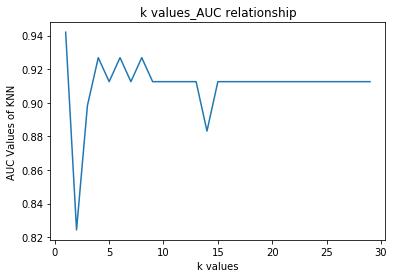

In [21]:
import matplotlib.pyplot as plt
plt.plot(x_vals,y_vals)
plt.ylabel('AUC Values of KNN')
plt.xlabel('k values')
plt.title('k values_AUC relationship')
plt.show()

**Q [2 Marks]:** Optimise the parameter k via cross-validated grid-search over a parameter grid.   
Note: 
1. Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best k value on the training set. The parameter grid is set to `np.arange(1, 30)`.
2. The model evaluation criteria is AUC performance.
3. Report the best k value and the corresponding AUC performance.
4. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

**Q [2 Marks]:** Train the KNN classification model via 5-fold CV.   
Note:  
1. Train a 5-fold CV KNN on the whole data. 
2. The model evaluation criteria is AUC performance.
3. Draw a figure with the x-axis representing the different k values `range(1,30)` in KNN and y-axis representing cross-validated AUC value. 
4. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

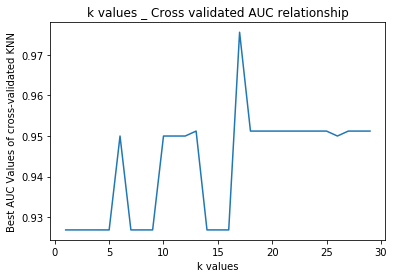

In [35]:
from sklearn.model_selection import cross_val_score
def cross_validatedAUC(k):
    X = numeric_cars.iloc[:,0:14]
    y = numeric_cars.iloc[:,14]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
    classifier_cv = KNeighborsClassifier(n_neighbors=k)
    #train model with cv of 5 
    cv_scores = cross_val_score(classifier_cv, X, y, cv=5)
#return max cv score
    return np.amax(cv_scores)

x_vals =[]
y_vals =[]
for k in range(1,30):
    x_vals.append(k)
    y_vals.append(cross_validatedAUC(k))

import matplotlib.pyplot as plt
plt.plot(x_vals,y_vals)
plt.ylabel('Best AUC Values of cross-validated KNN')
plt.xlabel('k values')
plt.title('k values _ Cross validated AUC relationship')
plt.show()